In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
!ls "/gdrive/My Drive/sample/"

10_left.jpeg   13_right.jpeg  16_left.jpeg   17_right.jpeg     sample
10_right.jpeg  15_left.jpeg   16_right.jpeg  resize_images
13_left.jpeg   15_right.jpeg  17_left.jpeg   resize_images.py


             0  1
0   10003_left  0
1  10003_right  0
2   10007_left  0
3  10007_right  0
4   10009_left  0
(8408,)
0
Instructions for updating:
Colocations handled automatically by placer.
2019-02-24 05:40:52.817295
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 7987 samples, validate on 421 samples
Epoch 1/20
 - 46s - loss: 4.9978 - acc: 0.6703 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 2/20
 - 45s - loss: 4.2857 - acc: 0.7324 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 3/20
 - 48s - loss: 4.2796 - acc: 0.7331 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 4/20
 - 49s - loss: 4.2811 - acc: 0.7332 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 5/20
 - 48s - loss: 4.2804 - acc: 0.7327 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 6/20
 - 48s - loss: 4.2789 - acc: 0.7329 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 7/20
 - 47s - loss: 4.2826 - acc: 0.7337 - val_loss: 5.3217 - v

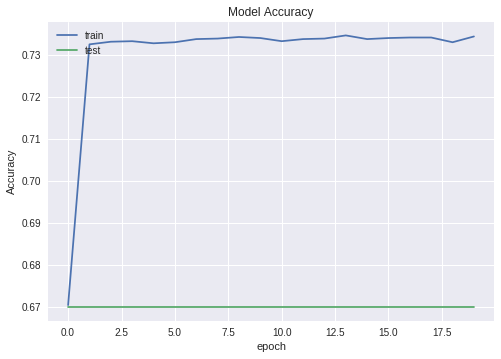

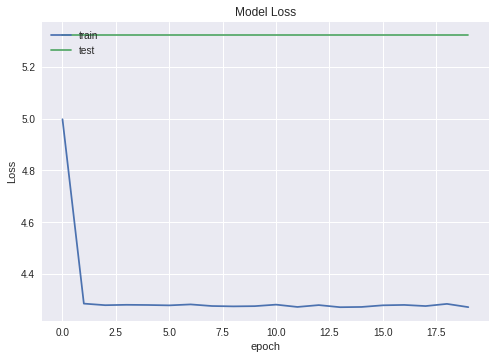

In [0]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train001_0_8408.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train001.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8408,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 512, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 512, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.00001, decay=0.0, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 20, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('my_model_train001_0_8408_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and validation   
print(dt.datetime.now())

#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

             0  1
0   10003_left  0
1  10003_right  0
2   10007_left  0
3  10007_right  0
4   10009_left  0
(8408,)
0
2019-02-24 06:57:50.423794
Train on 7987 samples, validate on 421 samples
Epoch 1/20
 - 43s - loss: 4.5082 - acc: 0.7076 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 2/20
 - 45s - loss: 4.2868 - acc: 0.7316 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 3/20
 - 42s - loss: 4.2844 - acc: 0.7327 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 4/20
 - 44s - loss: 4.2847 - acc: 0.7333 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 5/20
 - 43s - loss: 4.2810 - acc: 0.7331 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 6/20
 - 44s - loss: 4.2805 - acc: 0.7338 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 7/20
 - 42s - loss: 4.2740 - acc: 0.7338 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 8/20
 - 42s - loss: 4.2725 - acc: 0.7332 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 9/20
 - 44s - loss: 4.2847 - acc: 0.7326 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 10/20
 - 42s - loss: 4.2689 - acc: 0.7334 - va

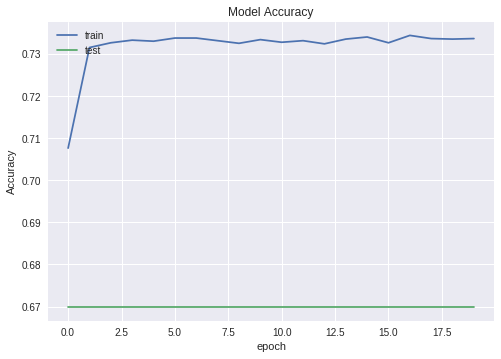

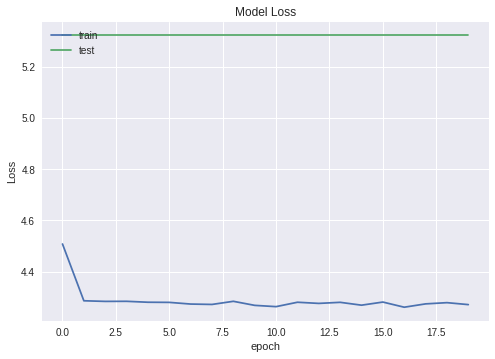

In [0]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train001_0_8408.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train001.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8408,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 512, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 512, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.00001, decay=1e-6, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 20, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001_0_8408_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and validation   
print(dt.datetime.now())

#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

             0  1
0   10003_left  0
1  10003_right  0
2   10007_left  0
3  10007_right  0
4   10009_left  0
(8408,)
0
2019-02-24 06:41:15.030002
Train on 7987 samples, validate on 421 samples
Epoch 1/50
 - 15s - loss: 3.9842 - acc: 0.5935 - val_loss: 3.1055 - val_acc: 0.6698
Epoch 2/50
 - 14s - loss: 2.5640 - acc: 0.5836 - val_loss: 1.5799 - val_acc: 0.6698
Epoch 3/50
 - 15s - loss: 1.8660 - acc: 0.5677 - val_loss: 1.1956 - val_acc: 0.6651
Epoch 4/50
 - 15s - loss: 1.4880 - acc: 0.5980 - val_loss: 1.0946 - val_acc: 0.6675
Epoch 5/50
 - 15s - loss: 1.3469 - acc: 0.6090 - val_loss: 1.0500 - val_acc: 0.6675
Epoch 6/50
 - 15s - loss: 1.2387 - acc: 0.6243 - val_loss: 1.0295 - val_acc: 0.6698
Epoch 7/50
 - 15s - loss: 1.1997 - acc: 0.6388 - val_loss: 1.0235 - val_acc: 0.6698
Epoch 8/50
 - 15s - loss: 1.1596 - acc: 0.6632 - val_loss: 1.0237 - val_acc: 0.6698
Epoch 9/50
 - 15s - loss: 1.1261 - acc: 0.6700 - val_loss: 1.0234 - val_acc: 0.6698
Epoch 10/50
 - 16s - loss: 1.0909 - acc: 0.6797 - va

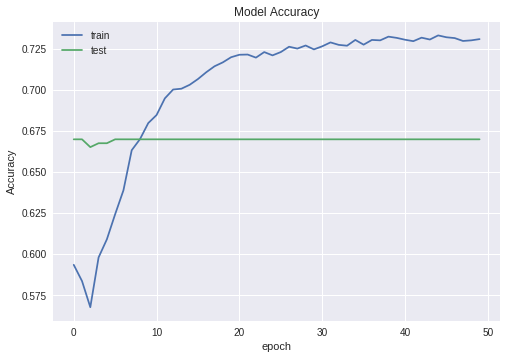

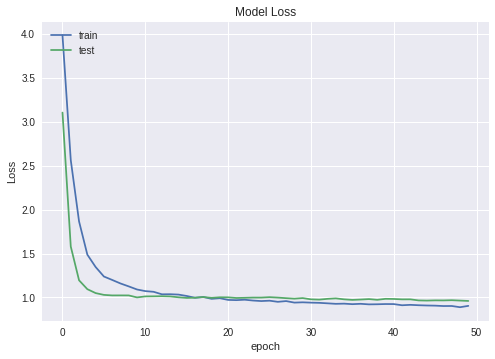

In [0]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train001_0_8408.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train001.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8408,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 128, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 128, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.00001, decay=1e-6, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 50, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('my_model_train001_0_8408_128.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and validation   
print(dt.datetime.now())

#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train001_0_8408.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train001.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8408,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 4096, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.00001, decay=1e-6, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 50, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('my_model_train001_0_8408_4096.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and validation   
print(dt.datetime.now())

#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Using TensorFlow backend.


             0  1
0   10003_left  0
1  10003_right  0
2   10007_left  0
3  10007_right  0
4   10009_left  0
(8408,)
0
Instructions for updating:
Colocations handled automatically by placer.
2019-02-25 13:52:37.063673
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 7987 samples, validate on 421 samples
Epoch 1/50
 - 418s - loss: 4.5099 - acc: 0.7190 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 2/50
 - 415s - loss: 4.2762 - acc: 0.7347 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 3/50
 - 414s - loss: 4.2770 - acc: 0.7346 - val_loss: 5.3217 - val_acc: 0.6698
Epoch 4/50


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<ipython-input-1-b925b8610690>", line 46, in <module>
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 50, verbose = 2, validation_split = 0.05)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1039, in fit
    validation_steps=validation_steps)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_arrays.py", line 199, in fit_loop
    outs = f(ins_batch)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2715, in __call__
    return self._call(inputs)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2675, in _call
    fetched = self._callable_fn(*array_vals)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py", line 1439, in __call__
    run_metadata_ptr)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Tr

TypeError: ignored